In [1]:
import numpy as np
from scipy.stats import sobol_indices, uniform
rng = np.random.default_rng()
def f_eq3(x):
    # x[0] = k, (0,1.50)
    # x[1] = gamma_g,
    
    # x[2] = C_0
    # x[3] = C_1
    k_1 = 135
    k_2 = 4.9 * 10**6
    R = 1.35 * 10**5

    
    f_eval = x[2] + x[3] * (x[0] * x[1] + (1 - x[1]) * (((-1 * k_2)/(2 * k_1 * R))+(((1)/(2 * k_1)) + ((k_2)/(2 * k_1 * R))**2)**(1/2)))
    
    return f_eval
indices = sobol_indices(
    func=f_eq3, n=2**14,
    dists=[
        uniform(loc= 0, scale= 1.5),
        uniform(loc= 0, scale= 1),
        uniform(loc= 0.5, scale= 0.5),
        uniform(loc= -1.5, scale= 2),
    
    ],
    random_state=rng
)
print("first order" , indices.first_order)
print("total order", indices.total_order)

first order [0.08876121 0.08791706 0.15759106 0.36915268]
total order [0.27573387 0.2687846  0.15756829 0.63878946]


In [2]:
boot = indices.bootstrap()

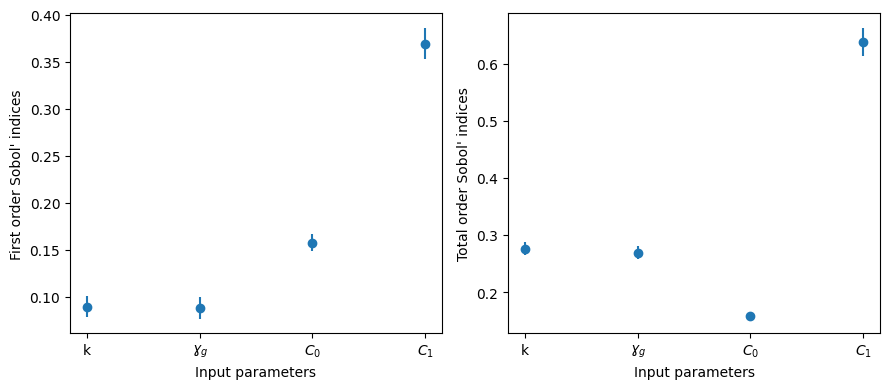

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
_ = axs[0].errorbar(
    ['k', '$ɣ_g$','$C_0$', '$C_1$'], indices.first_order, fmt='o',
    yerr=[
        indices.first_order - boot.first_order.confidence_interval.low,
        boot.first_order.confidence_interval.high - indices.first_order
    ],
)
axs[0].set_ylabel("First order Sobol' indices")
axs[0].set_xlabel('Input parameters')
axs[0].set_xticks(['k', '$ɣ_g$','$C_0$', '$C_1$'])
_ = axs[1].errorbar(
    ['k', '$ɣ_g$','$C_0$', '$C_1$'], indices.total_order, fmt='o',
    yerr=[
        indices.total_order - boot.total_order.confidence_interval.low,
        boot.total_order.confidence_interval.high - indices.total_order
    ],
)
axs[1].set_ylabel("Total order Sobol' indices")
axs[1].set_xlabel('Input parameters')
axs[1].set_xticks(['k', '$ɣ_g$','$C_0$', '$C_1$'])
plt.tight_layout()
plt.show()

In [4]:
from scipy.stats import qmc

lower = [0, 0, 0.5, 1]
upper = [1.5, 1, 1, 2]

n_dim = 4
p_labels = ['k', '$ɣ_g$','$C_0$', '$C_1$']
sample = qmc.Sobol(d=n_dim, seed=rng).random(1024)
sample = qmc.scale(
    sample=sample,
    l_bounds=lower,
    u_bounds=upper
)
output = f_eq3(sample.T)

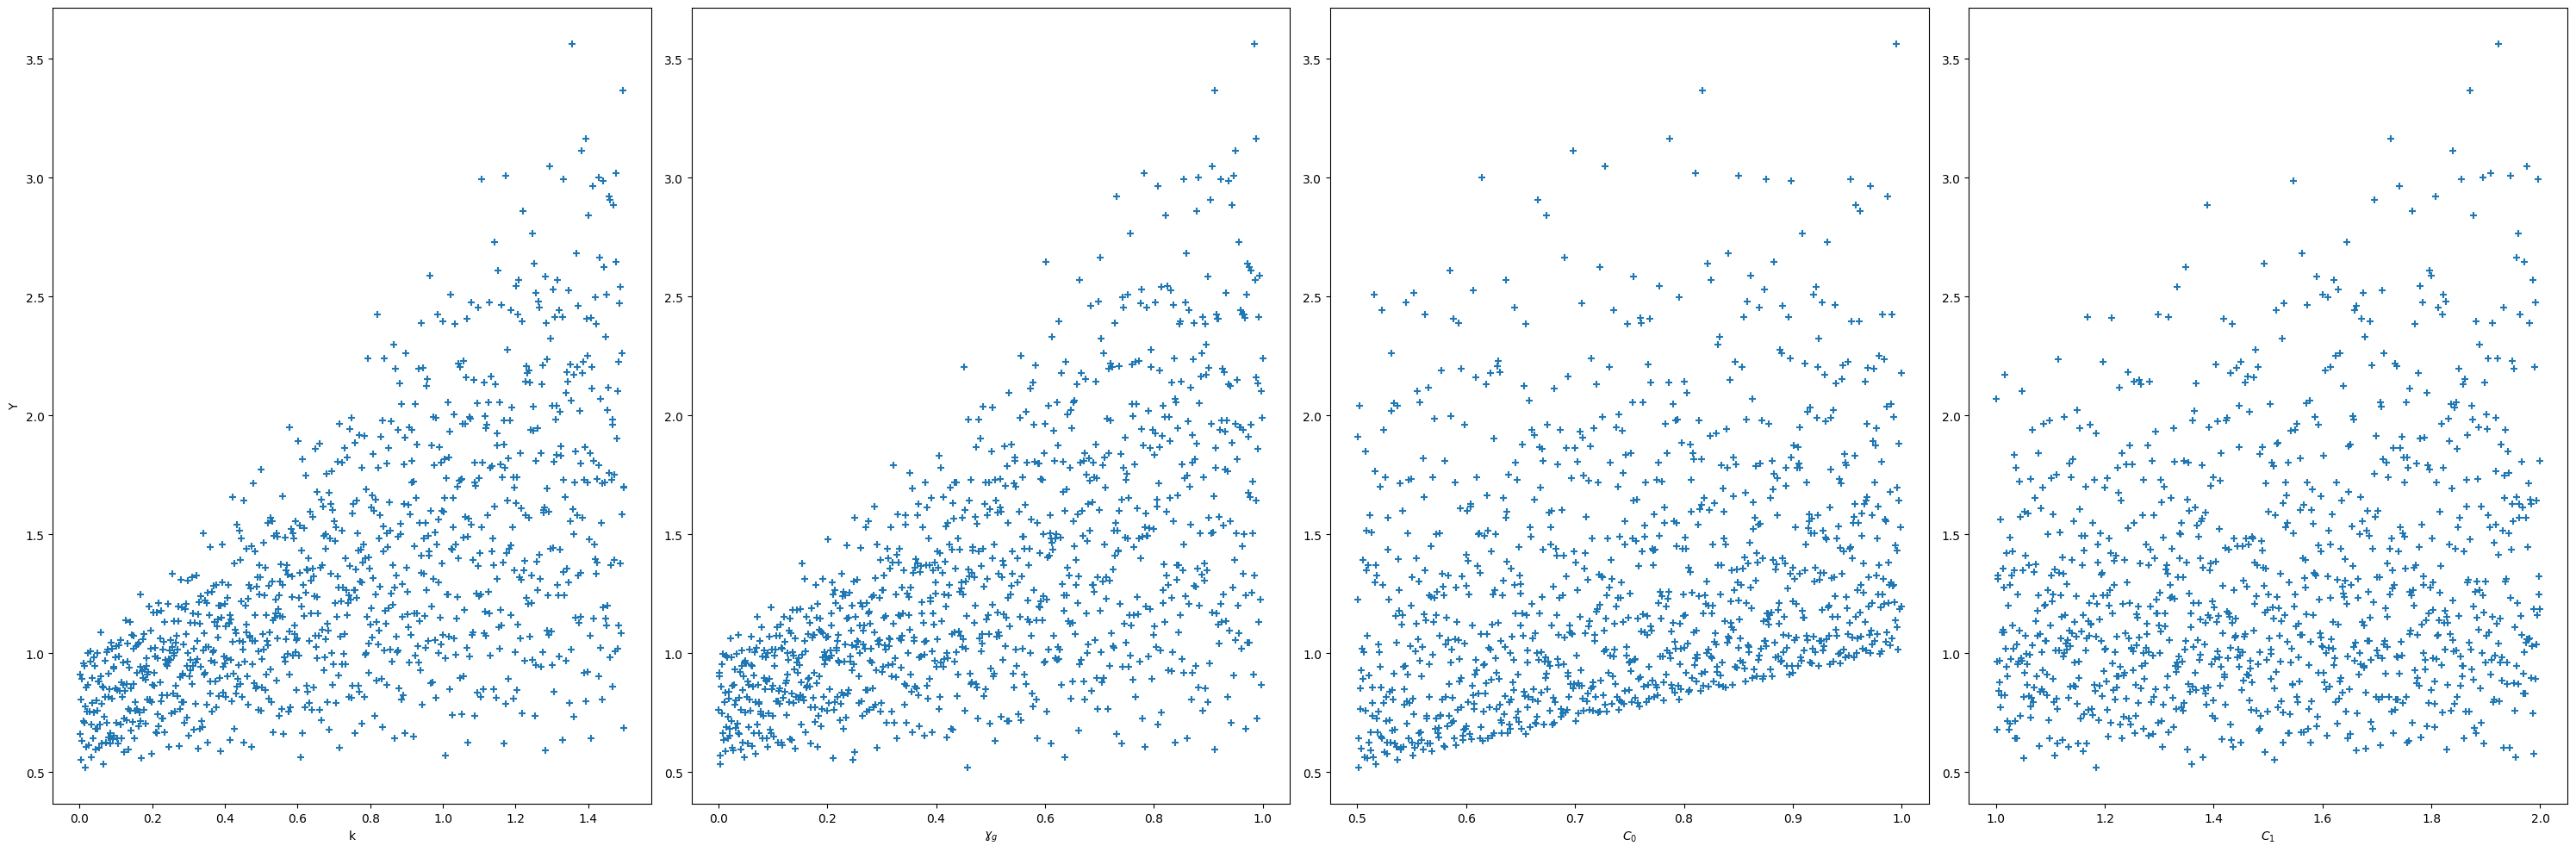

In [5]:
fig, ax = plt.subplots(1, n_dim, figsize=(30, 10))
for i in range(n_dim):
    xi = sample[:, i]
    ax[i].scatter(xi, output, marker='+')
    ax[i].set_xlabel(p_labels[i])
ax[0].set_ylabel('Y')
plt.tight_layout()
plt.show()

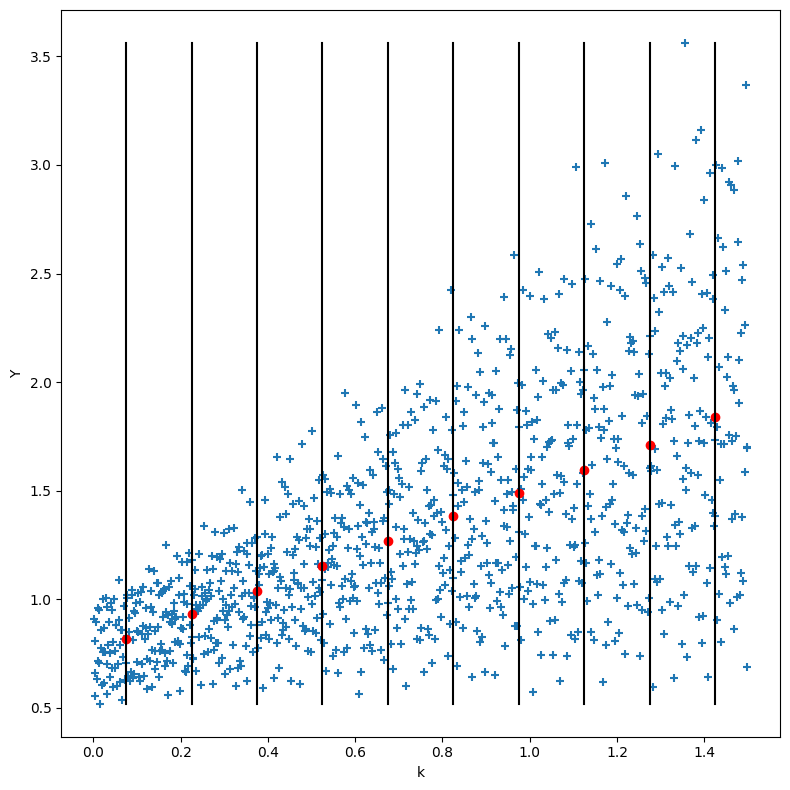

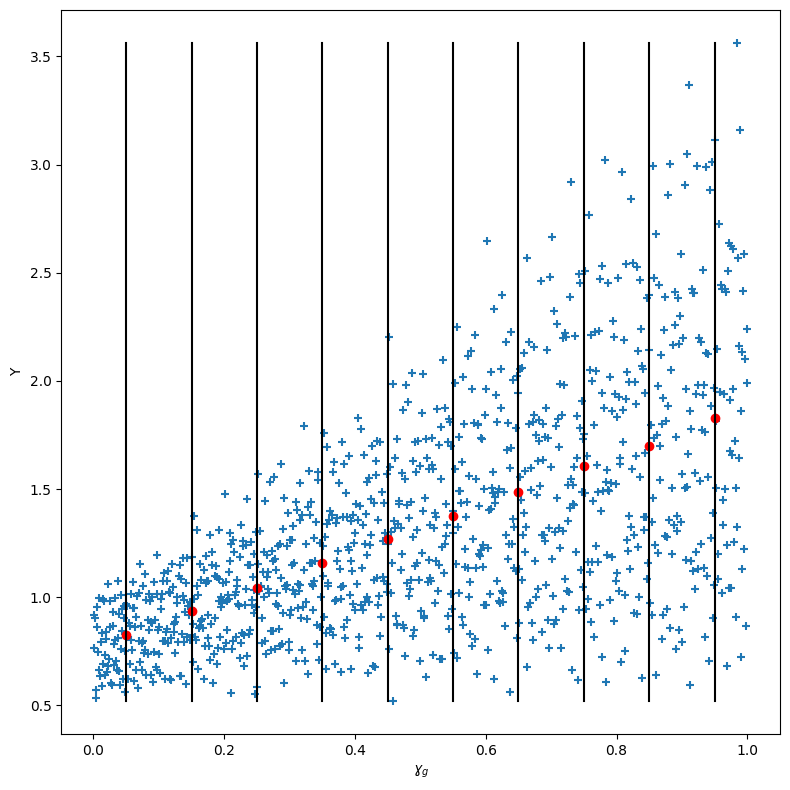

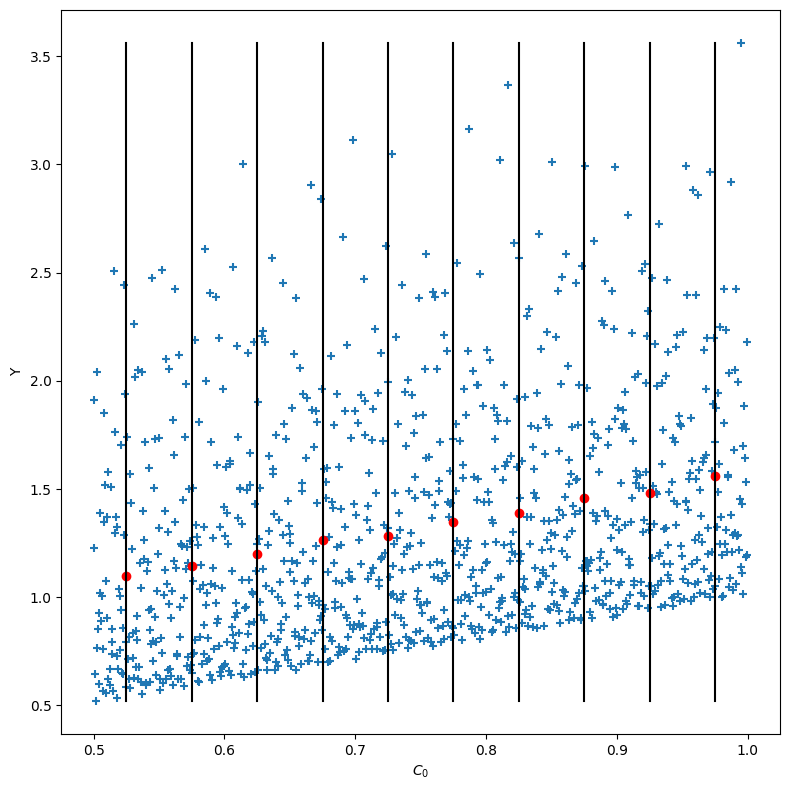

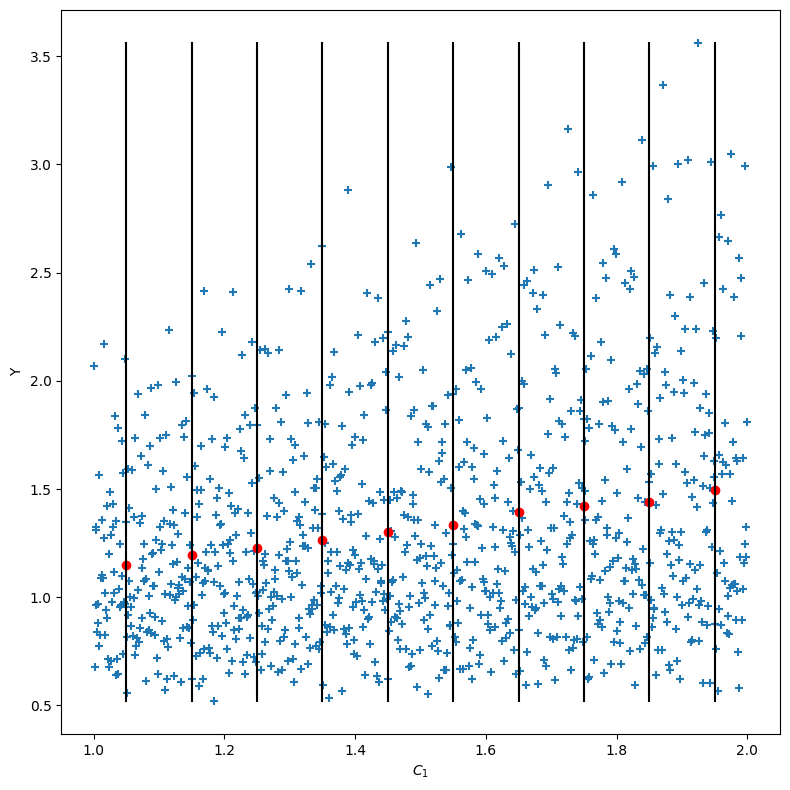

In [6]:
for z in range(n_dim):
    mini = np.min(output)
    maxi = np.max(output)
    n_bins = 10
    bins = np.linspace(lower[z], upper[z], num=n_bins, endpoint=False)
    dx = bins[1] - bins[0]
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    xi = sample[:, z]
    ax.scatter(xi, output, marker='+')
    ax.set_xlabel(p_labels[z])
    for bin_ in bins:
        idx = np.where((bin_ <= xi) & (xi <= bin_ + dx))
        xi_ = xi[idx]
        y_ = output[idx]
        ave_y_ = np.mean(y_)
        ax.plot([bin_ + dx/2] * 2, [mini, maxi], c='k')
        ax.scatter(bin_ + dx/2, ave_y_, c='r')
    ax.set_ylabel('Y')
    plt.tight_layout()
    plt.show()